<a href="https://example.com">Training School Diversity Notebook Session 4 (Non-programmers)</a> © 2026 by <a href="https://example.com">Louis Estève, Marie-Catherine de Marneffe, Nurit Melnik, Agata Savary, Olha Kanishcheva</a> is licensed under <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">CC BY-NC-SA 4.0</a><br/><img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/by.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/nc.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/sa.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;">

# UniDive Winter School - Diversity quantification (Non-programmers)

Welcome to this course in which we will show you how to quantify diversity, based on a framework we propose, inspired from practices in other scientific fields.

This interactive document contains the following sections:
*   **Section 1:** Meta-linguistic Diversity and the The World Atlas of Language Structures (WALS)
*   **Section 2:** Installations
*   **Section 3:** Distance between languages
*   **Section 4:** Looking for outliers
*   **Section 5:** Maximally diverse language set
*   **Section 6:** Wrap-up



# **Section 1. Installations**



This notebook runs on Python3. To know the specific version of Python3, run the following cell. It has been tested with Python 3.12.12.

In [1]:
!python3 --version

Python 3.12.12


The cell just below is meant to install the required external libraries, and
load both internal and external libraries.

| Library | Library type | Use | Will you interact with it |
| ------- | ------------ | --- | ------------------------- |
| `math` | Internal | Mathematical operations | No |
| `subprocess` | Internal | Launching subprocesses | No |
| `typing` | Internal | Typing hints for variables and functions | No |
| `conllu` | External | Processing `*.conllu` data | No |
| `diversutils` | External | Computing diversity | Yes |
| `lang2vec` | External | Obtaining language vectors (and subsequent distances between languages) | No |
| `matplotlib` | External | Plotting | No |
| `numpy` | External | Numerical computation | No |
| `pandas` | External | Processing tabular data | No |
| `scipy` | External | Scientific computing | No |


<font color="red">📌 Run the following code cell.
If it ends successfully it means that all necessary (external or internal) libraries have been imported and correctly installed.</font>


In [2]:
# Installations. The first line installs `diversutils`, while the second
# installs other external packages.

!pip install --upgrade git+https://github.com/estevelouis/WG4@fe5936aaacd0213f8426ddfbf2eefc7bb25a4a28
!pip install conllu lang2vec matplotlib numpy pandas python-iso639 scipy

# Imports from standard library. With the exception of custom builds of Python,
# you do not need to install anything for this to work.

import math
import subprocess
from typing import *

# Imports from external libraries.

import conllu
import diversutils
import iso639
import lang2vec.lang2vec as l2v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp


  Cloning https://github.com/estevelouis/WG4 (to revision fe5936aaacd0213f8426ddfbf2eefc7bb25a4a28) to /tmp/pip-req-build-r6gsamsj
  Running command git clone --filter=blob:none --quiet https://github.com/estevelouis/WG4 /tmp/pip-req-build-r6gsamsj
  Running command git rev-parse -q --verify 'sha^fe5936aaacd0213f8426ddfbf2eefc7bb25a4a28'
  Running command git fetch -q https://github.com/estevelouis/WG4 fe5936aaacd0213f8426ddfbf2eefc7bb25a4a28
  Resolved https://github.com/estevelouis/WG4 to commit fe5936aaacd0213f8426ddfbf2eefc7bb25a4a28
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
  Created wheel for diversutils: filename=diversutils-0.4.2-cp312-cp312-linux_x86_64.whl size=329688 sha256=592a9439105fb1b8dfa1f701e41594ee137fb489d6ac533813774e8e01af04e6
  Stored in directory: /root/.cache/pip/wheels/0f/25/e4/5ec8cbd88d6472e11f59546154c738912bec0057e872eab7a5
Successfully built diversutils
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# **Section 2. Meta-linguistic Diversity and WALS**



## 2.1 Discover WALS

Discover WALS
1.   Pick Armenian and Greek in [WALS](https://wals.info/languoid)
2.   What do the pages represent?
3.   How many genders does each of the two languages have?
4.   How many cases does each of the two languages have?
5.   Does each language have (in)definite articles?
6.   Are nominal adpositions prepositions or postpositions?
7.   Does each langage have the same word for finger and hand? What about hand and arm?

WALS in general
1. How many languages does it describe? (2662)
2. How many features does it have? (192)

<!--Comparing langugages using WALS
1. Can you think of a way to do this?
2.-->

Can you think of a way of comparing languages using WALS?


## 2.2 Vectors

For each language in WALS, its features can be described by numbers. Most often, it is boolean numbers (i.e. either 0 or 1), but it can also be a natural number, such as the number of genders in a language.

On this basis, we can imagine a language's features as coordinates in space, and thus measure a distance between them.

For instance if we consider only two features, e.g. the number of genders and the number of cases in a language, we can visualise Armenian, English, and French as follows.

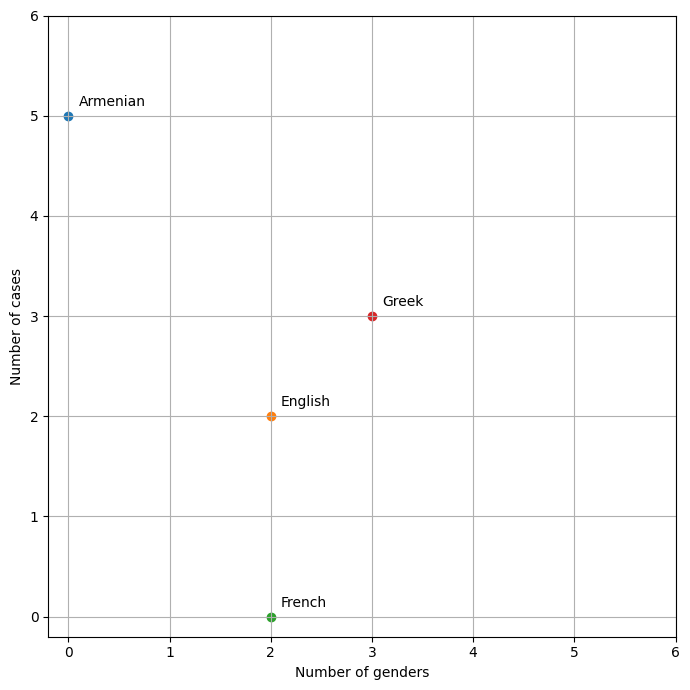

In [3]:
fig, ax = plt.subplots(figsize=(7,7))

vectors = {
    "Armenian": [0, 5],
    "English": [2, 2],
    "French": [2, 0],
    "Greek": [3, 3],
}

ax.set_xlabel("Number of genders")
ax.set_ylabel("Number of cases")
ax.set_xlim(left=-0.2, right=6.0)
ax.set_ylim(bottom=-0.2, top=6.0)
ax.grid(which="major", axis="both", zorder=0)

for lang in vectors.keys():
  vector = vectors[lang]
  ax.scatter(vector[0], vector[1])
  ax.annotate(text=lang, xy=(vector[0] + 0.1, vector[1] + 0.1))

plt.tight_layout()
plt.show()


# **Section 3. Distances between languages**

In this section we will learn to compute the distance between languages seen as vectors. Unlike in the previous section where -- for the needs of the example -- we used only two features, here we will use all features defined in both languages (this results for the selected languages in dozens of features at once).

We will use the following languages, which are languages of the countries the trainees and trainers are affiliated with, with the condition that the language has sufficiently many defined features in WALS (at least 50).


In [4]:
# ISO 639-2
LANGS = [
  "ara", # Arabic
  "ces", # Czech
  "deu", # German
  "ell", # Greek
  "heb", # Hebrew
  "eng", # English
  "fra", # French
  "gle", # Irish
  "hye", # Armenian
  "ita", # Italian
  "lit", # Lithuanian
  "nld", # Dutch
  "pol", # Polish
  "rom", # Romanian
  "slv", # Slovenian
  "spa", # Spanish
  "swe", # Swedish
  "tur", # Turkish
  "ukr", # Ukrainian
]



Now we load the vectors of the list of the 19 languages.

In [9]:
vector_space = l2v.get_features(LANGS, "syntax_wals")

We define a distance function, which for us is a cosine distance between two vectors (i.e. features defined for both languages). Parameters `a` and `b` are the ISO 639-2 three-letter codes for languages, as defined above.

In [10]:
def dist_lang(a, b):
    if type(a) not in [list, np.ndarray]:
      a = [a]
    if type(b) not in [list, np.ndarray]:
      b = [b]
    _a = vector_space[a[0]]
    _b = vector_space[b[0]]
    __a = []
    __b = []
    for x, y in zip(_a, _b):
        if type(x) == str or type(y) == str:
            continue
        __a.append(x)
        __b.append(y)
    return sp.spatial.distance.cosine(__a, __b)


Use the function `dist_lang` to measure the distance between Armenian and Greek. The 3-letter language codes must be given in double quotes.

In [11]:
# <STUDENT-TODO>
dist_lang("hye","ell")
# </STUDENT-TODO>

np.float64(0.3121640605712054)

Pick two languages from the dataset which you know are close to each other. What is the distance between them?

Pick two languages from the dataset which you know are rather distant from each other. What is the distance between them?

In [ ]:
# <STUDENT-TODO>
# </STUDENT-TODO>

In the follow-up, distances between languages will be stored in a matrix, which can be understood as a table.


In [12]:
local_langs = ["hye", "eng", "fra", "ell"]

matrix = []
for a in local_langs:
  dists = []
  for b in local_langs:
    dists.append(dist_lang(a, b))
  matrix.append(dists)

matrix_df = pd.DataFrame(matrix, index=local_langs, columns=local_langs)
matrix_df

,hye,eng,fra,ell
hye,0.000000,0.360398,0.427922,0.312164
eng,0.360398,0.000000,0.221710,0.202919
fra,0.427922,0.221710,0.000000,0.254399
ell,0.312164,0.202919,0.254399,0.000000


# **Section 4. Looking for outliers**

**Which language in the dataset is the most distant from all other languages in the dataset?**

Based on your intuition, what is the answer to this question? What did you base your answer on?

To answer this question empirically we calculate each language's distance from all other languages and then aggregate those distances, using an average.
See optional exercises at the bottom of this notebook for further working on this topic.

In the next cell, we define the `distance_matrix`, which will be used afterwards to obtain submatrices of distances.

In [13]:
_langs = [[x] for x in LANGS]
distance_matrix = sp.spatial.distance.cdist(_langs, _langs, dist_lang).astype(np.float32) # <--

################################################################################

hasnan = np.any(np.isnan(distance_matrix))
assert not hasnan, f"A NAN (not a number) was found in the distance matrix. Consider increasing the minimum number of features to ensure that all distances between languages can be computed."

df_dict = {key: [] for key in ["ISO 639-2", "Language", "# defined features in WALS", "Average distance to other languages"]}
for i, language in enumerate(LANGS):
  df_dict["ISO 639-2"].append(language)
  df_dict["Language"].append(iso639.Language.match(language).name)
  df_dict["# defined features in WALS"].append(len(list(filter(lambda x: x != "--", vector_space[language]))))
  df_dict["Average distance to other languages"].append(float(np.mean(distance_matrix[i])))
df_lang = pd.DataFrame(df_dict).sort_values("Average distance to other languages")
df_lang


,ISO 639-2,Language,# defined features in WALS,Average distance to other languages
14,slv,Slovenian,53,0.189010
18,ukr,Ukrainian,70,0.201681
3,ell,Modern Greek (1453-),83,0.207368
13,rom,Romany,57,0.212507
12,pol,Polish,71,0.222819
5,eng,English,98,0.228084
15,spa,Spanish,96,0.232192
9,ita,Italian,74,0.241626
16,swe,Swedish,77,0.248813
2,deu,German,84,0.249716


# **Section 5. Maximally diverse language sets**

Based on your intuition, which 5 languages from the dataset are most distant from each other?

## 5.1 Obtaining a submatrix of distances

To empirically test your hypothesis we first need to define a function that extracts a submatrix of distances only containing the languages we are interested in. Said function is defined in the next cell.

In [15]:
def get_submatrix_and_relevant_indices_for_languages(languages: List[str]) -> Tuple[np.array, List[int]]:
    """
    This function takes a list of languages and returns a `tuple` of the
    `distance_submatrix` as well as the list of indices of the relevant
    languages.
    """

    global distance_matrix
    global LANGS

    relevant_indices = [i for i, lang in enumerate(LANGS) if lang in languages]
    irrelevant_indices = sorted(set(range(len(LANGS))) - set(relevant_indices))

    distance_submatrix = distance_matrix[:, :] # (2)
    distance_submatrix = np.delete(distance_submatrix, irrelevant_indices, axis=0)
    distance_submatrix = np.delete(distance_submatrix, irrelevant_indices, axis=1)

    return distance_submatrix, relevant_indices

Earlier in this notebook, we told you to hypothesize about a subset of diverse languages.

Call the function `get_submatrix_and_relevant_indices_for_languages` with the tuple of your selected languages. The first element of the resulting `tuple` will be the distance submatrix.

In [16]:
# <STUDENT-TODO>
#local_langs = [...]
# </STUDENT-TODO>

distance_submatrix, relevant_indices = get_submatrix_and_relevant_indices_for_languages(local_langs)
matrix_df = pd.DataFrame(distance_submatrix, index=local_langs, columns=local_langs)
matrix_df

,hye,eng,fra,ell
hye,0.000000,0.202919,0.254399,0.312164
eng,0.202919,0.000000,0.221710,0.360398
fra,0.254399,0.221710,0.000000,0.427922
ell,0.312164,0.360398,0.427922,0.000000


## 5.2 Finding the disparity of a subset of languages

Experiment with different subsets, to find an optimal subset.
This part will be like session 3 - they experiment with different subsets and plot them.

<font color="red">📌 Run the following code cell to define the function `display` for plotting the diversity measures of the various genre combinations.</font>

In [18]:
def display():
  # Printing to the screen.

  _result = sorted(result, key=lambda q: q[1])

  #df_dict = {key: [] for key in ["disparity", "balance", "chao_et_al_alpha1"]}
  df_dict = {key: [] for key in ["pairwise"]}
  language_tuples = []
  for z in _result:
      pairwise = z[1]
      df_dict["pairwise"].append(pairwise)
      language_tuples.append(', '.join(z[0]))
  df_display = pd.DataFrame(df_dict, index=language_tuples).sort_values("pairwise")

  return df_display

Complete the function `get_diversity_from_languages` below to calculate the disparity of a subset of languages.

In [23]:
################################################################################

result: List[Tuple[List[str], Tuple[float]]] = []
x: List[float] = []
y: List[float] = []

################################################################################

def get_diversity_from_languages(languages: Tuple[str]) -> Tuple[float]:
    """
    This function takes a list of languages.

    It returns a disparity score.
    """

    assert type(languages) == tuple and all(type(x) == str for x in languages), f"'languages' argument must be of type List[str]"
    assert len(set(languages)) == len(languages), "'languages' must not contain duplicate languages."
    assert all(language in LANGS for language in languages), f"'languages' contains language(s) which are unknown: {list(filter(lambda x: x not in LANGS, languages))}. Available languages (as stored in variable LANGS): {LANGS}."

    # `voc` is a Counter object, which is essentially just a fast dictionnary.
    # Its keys are of type `str`, and correspond to categories.
    # Its values of type `int`, and correspond to the number of elements per
    # categories.
    #
    # We now need to transfer this information to `diversutils`, which will
    # return the diversity scores we need. Here are the steps to follow, as
    # explained in the course.
    #     (1) Create an empty graph, which will be referred to with an `int`.
    #     (2) Obtain the distance submatrix and related relevant indices that
    #         corresponds to your choice of languages. To do so, use
    #         `get_submatrix_and_relevant_indices_for_languages(languages)`.
    #     (3) For each selected category, add a node to the graph, the number
    #         of elements equal to 1. Make sure to add categories
    #         in the same order of indices as in your submatrix.
    #     (4) Once all categories have been added as nodes, tell `diversutils`
    #         to compute the distribution (i.e., computing relative
    #         proportions, trivial here).
    #     (5) Attach the submatrix of distances. You may do so using
    #         `diversutils.attach_distance_matrix(graph, new_matrix, diversutils.FP32)`.
    #     (6) Compute the paiwise disparity store it in a variable.
    #     (7) (optional) Tell `diversutils` to free the graph, so as to reduce
    #         memory usage. If not done, `diversutils` will free all remaining
    #         graphs at the end of the process.
    #
    # Note that for this description, the terms we used are quite similar to
    # the names of methods you have to call. Therefore, running
    # `print(dir(diversutils))` may help you know which methods are available,
    # and which to use.

    # <STUDENT-TODO>
    graph: int = diversutils.create_empty_graph(0, 0) # (1)

    distance_submatrix, relevant_indices = get_submatrix_and_relevant_indices_for_languages(languages) # (2)

    for i in relevant_indices:
        add_node_result: int = diversutils.add_node(graph, 1) # (3)
        if add_node_result != 0:
            raise Exception(f"Failed to call diversutils.add_node(g, v). Return status: {add_node_result}")
    diversutils.compute_relative_proportion(graph) # (4)
    diversutils.attach_distance_matrix(graph, distance_submatrix, diversutils.FP32) # (5)

    disparity: float = diversutils.individual_measure(graph, diversutils.DF_DISPARITY_PAIRWISE)[0] # (6)
    diversutils.free_graph(graph) # (7)
    # </STUDENT-TODO>

    result.append((sorted(languages), [disparity]))

    return disparity

################################################################################

In [24]:
get_diversity_from_languages(("hye", "eng", "fra", "ell", "pol"))

0.2668961428105831

## 5.3 Finding the disparity of a subset of languages
Use the function above to find the subset of 5 lanaguges with the highest disparity.

In [27]:
################################################################################

# We now want to test various combinations of genres, and see which ones have
# the highest diversity scores.
#
# Each time you call `get_diversity_for_genres` with a list of genres, it adds
# the necessary data and resulting diversity scores into `result`, `x`, and `y`.
#
# You may then manually call for example
#
# get_diversity_from_languages(("fre", "eng"))
# get_diversity_from_languages(("ita", "pol"))
#
# and then see the scores it gives, along with the plot.
# In the lines above, the calls are hard-coded, but perhaps there could be more
# convenient ways to test a wide array of possible language lists?
# You may formulate multiple hypotheses and test them.


# <STUDENT-TODO>
get_diversity_from_languages(("hye", "eng", "fra", "ell", "ukr"))
# </STUDENT-TODO>

display()


,pairwise
"ell, eng, fra, hye, ukr",[0.253406785428524]
"ell, eng, fra, hye, ukr",[0.253406785428524]
"ell, eng, fra, hye, pol",[0.2668961428105831]


# **Section 6. Wrap-Up**

Assignment 4 - wrap-up

In this session, what were the elements and what were the categories?
What type of diversity did we deal with here - in-text, meta-linguistic or processing?
In this session, to which dimension of diversity (variety, balance, disparity) can we assign the measure manipulated here (i.e., aggregation of distances)?
Would it make sense to talk in this context about variety and balance?
In many NLP scenarios two properties of multi-lingual datasets are considered: language and size. What other dimension of diversity is then relevant?